In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.environment import Corridor
from src.agent import MonteCarloAgent, QLearningAgent, SARSAAgent, ExpectedSARSAAgent
from src.training import train_monte_carlo, train_td_learning, compare_algorithms
from src.visualization import plot_training_results, plot_algorithm_comparison

## 1. Training with Q-Learning

Q-Learning is an off-policy TD control algorithm that learns the optimal Q-function.

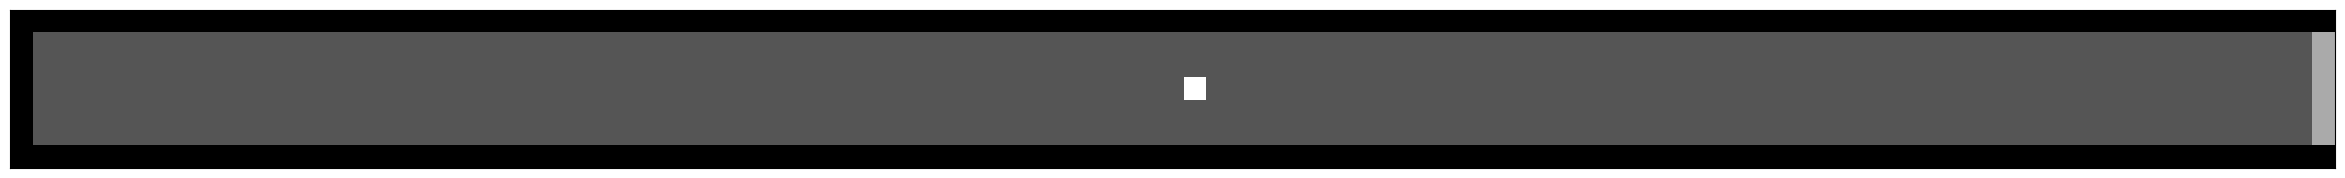

Episode: 900
Last number of steps: 501
Last total reward: -501
Epsilon: 5.897190294782201e-05


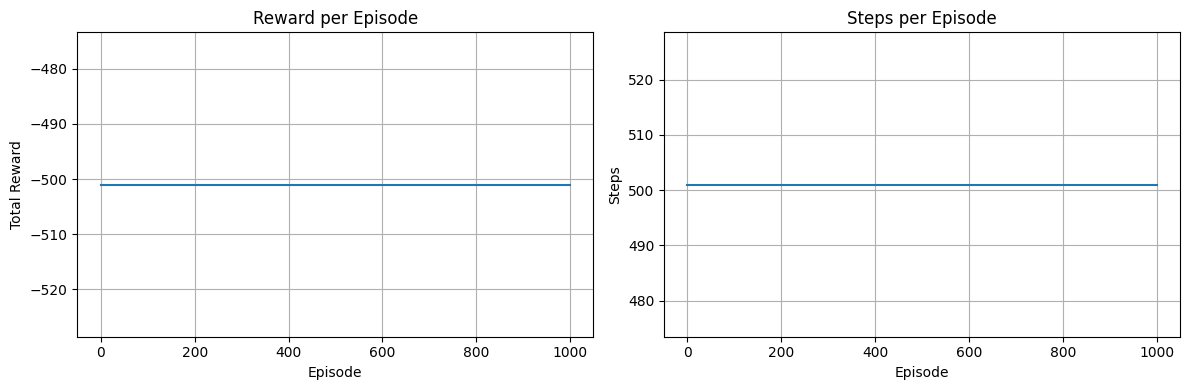

In [ ]:
# Create environment and Q-Learning agent
corridor = Corridor(length=100)
q_agent = QLearningAgent(corridor, gamma=0.9, alpha=0.1, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, q_agent, n_epochs=1000, max_steps=500, display_interval=100
)

# Plot results
plot_training_results(reward_history, steps_history)

## 2. Training with SARSA

SARSA is an on-policy TD control algorithm that learns the Q-function of the current policy.

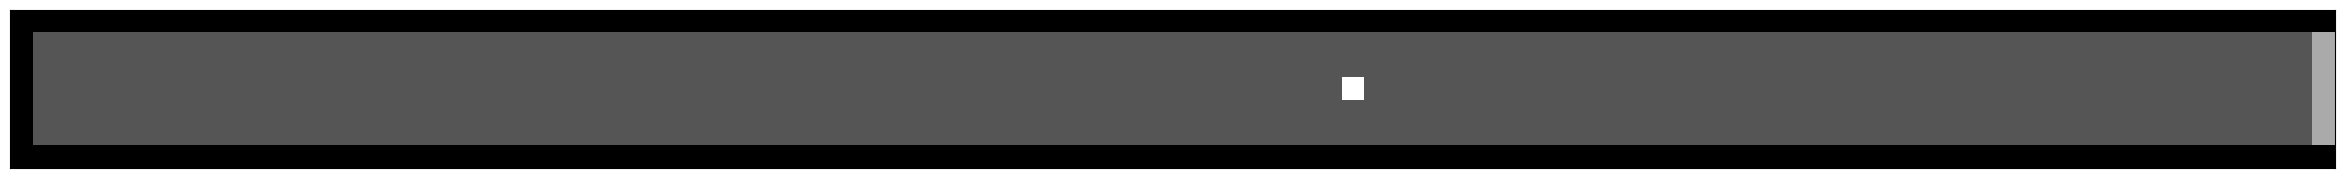

Episode: 900
Last number of steps: 501
Last total reward: -501
Epsilon: 5.897190294782201e-05


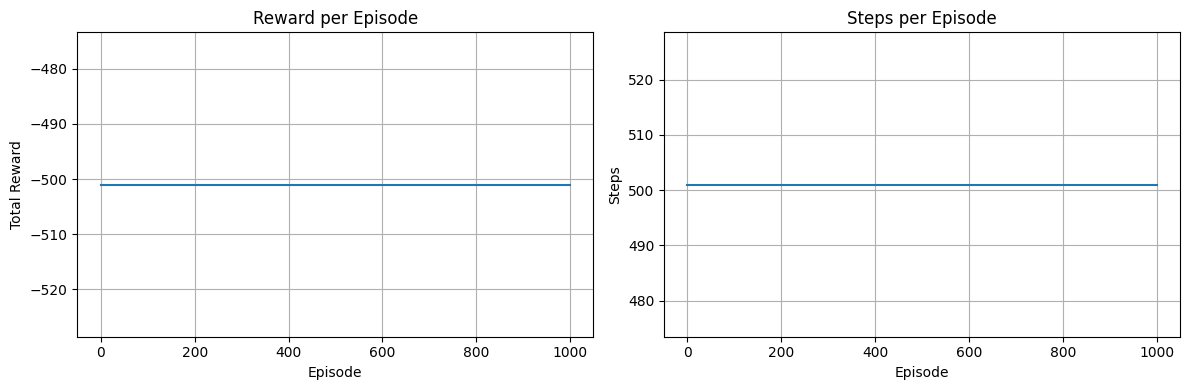

In [ ]:
# Create environment and SARSA agent
corridor = Corridor(length=100)
sarsa_agent = SARSAAgent(corridor, gamma=0.9, alpha=0.1, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, sarsa_agent, n_epochs=1000, max_steps=500, display_interval=100
)

# Plot results
plot_training_results(reward_history, steps_history)

## 3. Training with Expected SARSA

Expected SARSA is a more stable variant that uses the expected value under the current policy.

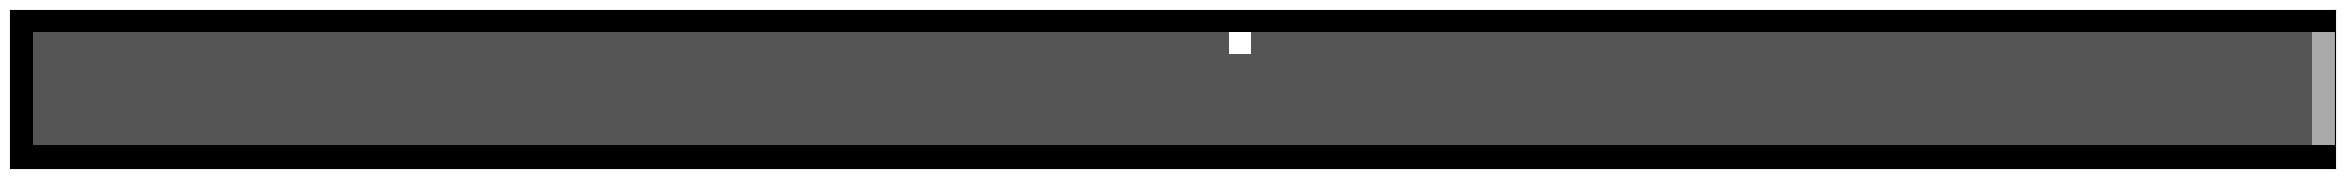

Episode: 900
Last number of steps: 501
Last total reward: -501
Epsilon: 5.897190294782201e-05


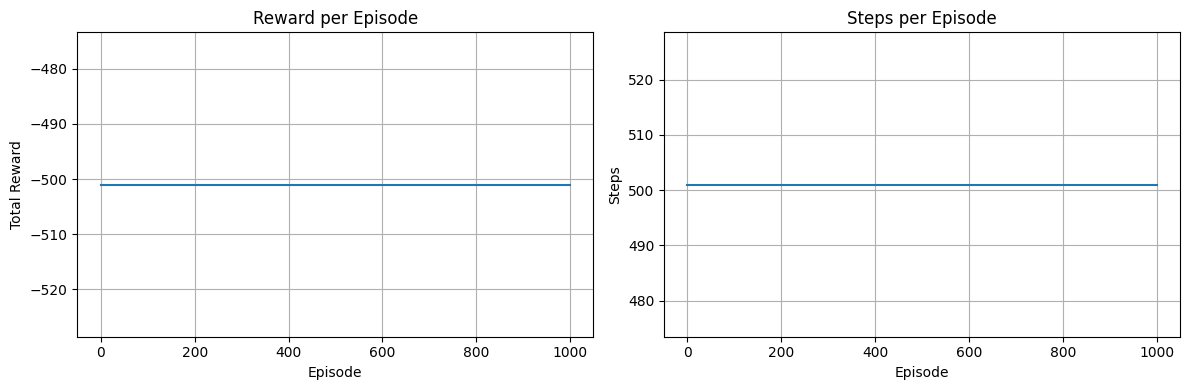

In [ ]:
# Create environment and Expected SARSA agent
corridor = Corridor(length=100)
expected_sarsa_agent = ExpectedSARSAAgent(corridor, gamma=0.9, alpha=0.1, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_td_learning(
    corridor, expected_sarsa_agent, n_epochs=1000, max_steps=500, display_interval=100
)

# Plot results
plot_training_results(reward_history, steps_history)

## 4. Training with Monte Carlo

Monte Carlo methods wait until the end of an episode to update values.

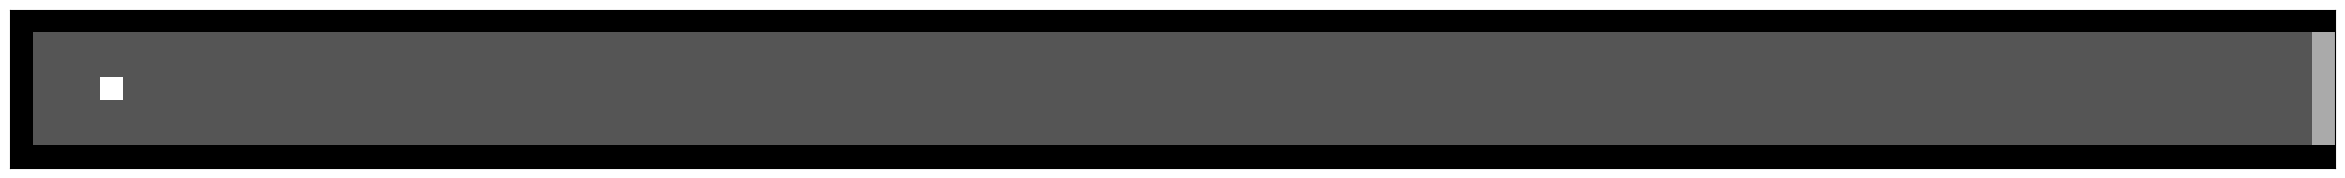

Episode: 900
Last number of steps: 501
Last total reward: -501
Epsilon: 5.897190294782201e-05


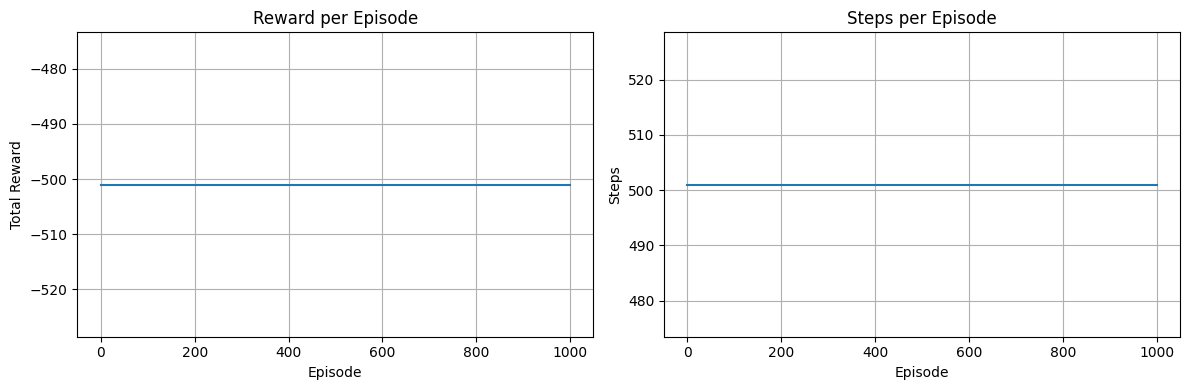

In [ ]:
# Create environment and Monte Carlo agent
corridor = Corridor(length=100)
mc_agent = MonteCarloAgent(corridor, gamma=0.9, alpha=0.1, epsilon=0.5)

# Train the agent
steps_history, reward_history = train_monte_carlo(
    corridor, mc_agent, n_epochs=1000, max_steps=500, display_interval=100
)

# Plot results
plot_training_results(reward_history, steps_history)

## 5. Algorithm Comparison

Let's compare all algorithms side-by-side over multiple runs.

In [ ]:
# Define algorithms to compare
algorithms = {
    "Q-Learning": QLearningAgent,
    "SARSA": SARSAAgent,
    "Expected SARSA": ExpectedSARSAAgent,
    "Monte Carlo": MonteCarloAgent,
}

# Run comparison
results = compare_algorithms(
    env_config={"length": 100, "width": 5},
    algorithms=algorithms,
    n_epochs=1000,
    max_steps=500,
    n_runs=5,
)


Training Q-Learning...
  Run 1/5: Final avg reward = -501.00
  Run 2/5: Final avg reward = -501.00
  Run 3/5: Final avg reward = -501.00
  Run 4/5: Final avg reward = -501.00
  Run 5/5: Final avg reward = -501.00

Training SARSA...
  Run 1/5: Final avg reward = -501.00
  Run 2/5: Final avg reward = -501.00
  Run 3/5: Final avg reward = -501.00
  Run 4/5: Final avg reward = -501.00
  Run 5/5: Final avg reward = -501.00

Training Expected SARSA...
  Run 1/5: Final avg reward = -501.00
  Run 2/5: Final avg reward = -501.00
  Run 3/5: Final avg reward = -501.00
  Run 4/5: Final avg reward = -501.00
  Run 5/5: Final avg reward = -501.00

Training Monte Carlo...
  Run 1/5: Final avg reward = -501.00
  Run 2/5: Final avg reward = -501.00
  Run 3/5: Final avg reward = -501.00
  Run 4/5: Final avg reward = -501.00
  Run 5/5: Final avg reward = -501.00


### Visualize Comparison Results

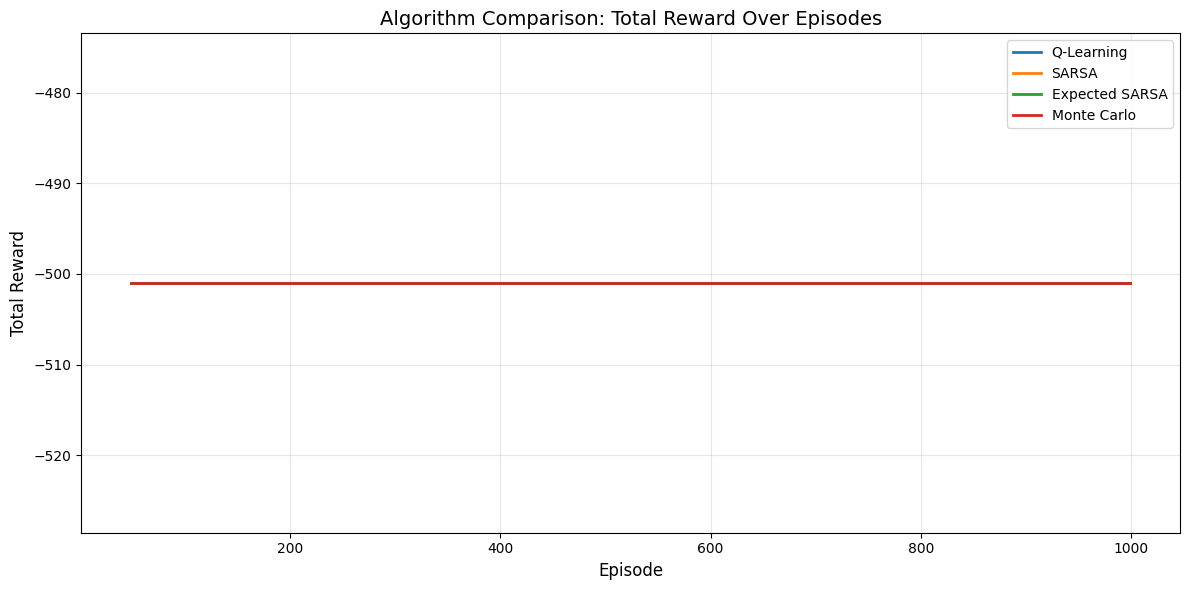


Final Performance (last 100 episodes average):
------------------------------------------------------------
Q-Learning          :  -501.00 ±   0.00
SARSA               :  -501.00 ±   0.00
Expected SARSA      :  -501.00 ±   0.00
Monte Carlo         :  -501.00 ±   0.00
------------------------------------------------------------


In [ ]:
# Plot reward comparison
plot_algorithm_comparison(results, metric="rewards", window=50)

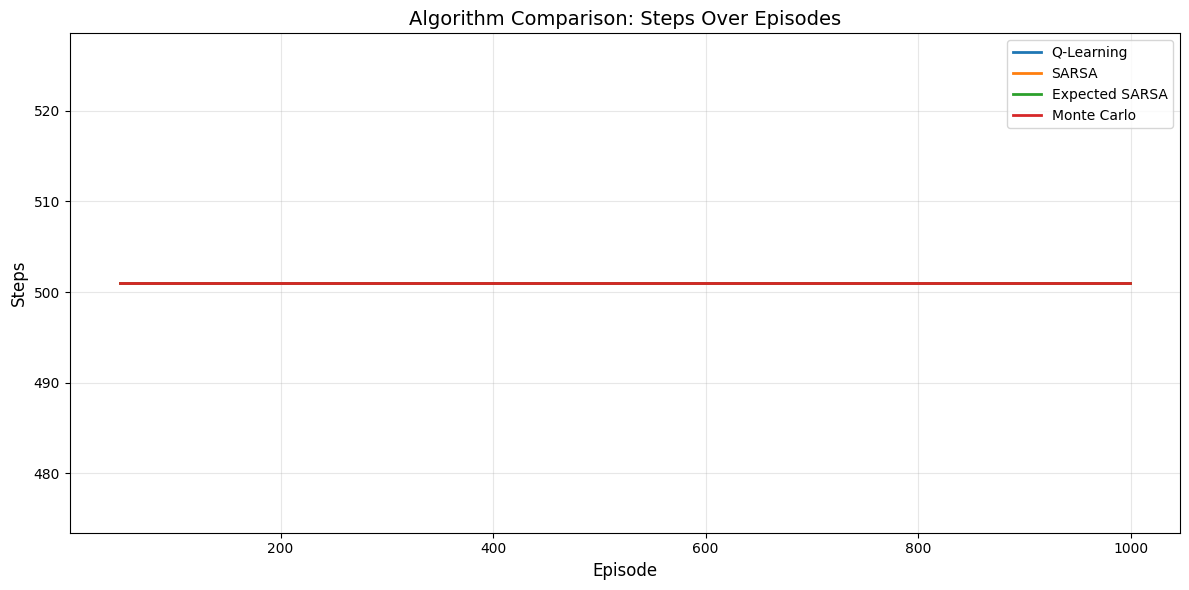


Final Performance (last 100 episodes average):
------------------------------------------------------------
Q-Learning          :  -501.00 ±   0.00
SARSA               :  -501.00 ±   0.00
Expected SARSA      :  -501.00 ±   0.00
Monte Carlo         :  -501.00 ±   0.00
------------------------------------------------------------


In [ ]:
# Plot steps comparison
plot_algorithm_comparison(results, metric="steps", window=50)

## 6. Test Trained Agent

Let's visualize a trained agent navigating the corridor.

In [ ]:
from src.visualization import generate_episode_gif

# Use the best performing algorithm (typically Q-Learning or Expected SARSA)
corridor = Corridor(length=100)
agent = QLearningAgent(corridor, gamma=0.9, alpha=0.1, epsilon=0.5)

# Train
print("Training agent...")
train_td_learning(corridor, agent, n_epochs=1000, max_steps=500)

# Generate GIF
print("Generating GIF...")
generate_episode_gif(
    corridor=corridor,
    agent=agent,
    output_path="images/q_learning_robot.gif",
    show_frames=True,
    frame_interval=100,
    dpi=300,
)

## 7. Hyperparameter Exploration

Compare different learning rates and discount factors.

In [ ]:
# Compare different learning rates for Q-Learning
learning_rates = [0.01, 0.1, 0.5]
lr_results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    corridor = Corridor(length=100)
    agent = QLearningAgent(corridor, gamma=0.9, alpha=lr, epsilon=0.5)
    steps, rewards = train_td_learning(corridor, agent, n_epochs=500, max_steps=500)
    lr_results[f"α={lr}"] = {
        "mean_rewards": rewards,
        "std_rewards": np.zeros_like(rewards),
        "mean_steps": steps,
        "std_steps": np.zeros_like(steps),
        "final_performance_mean": np.mean(rewards[-100:]),
        "final_performance_std": 0,
    }

# Plot comparison
plot_algorithm_comparison(lr_results, metric="rewards", window=20)